# BlueQubit hackathon

In [88]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile



In [195]:
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_2_42q.qasm")

In [196]:
#q.draw('mpl')

Total number of gates: 3155

Measurement order: 33 24 23 7 

In [197]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
q_num = 28
gate_count = 0
gate_num = 0
gate_position = []
double_qubit_gates_number = []
for gate in q.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 == q_num or q2 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
            double_qubit_gates_number.append(gate_count - 1)
    gate_num = gate_num + 1

print(gate_count)
print(gate_position)
print(double_qubit_gates_number)

43
[1304, 1305, 1306, 1307, 1308, 1309, 1310, 2672, 2673, 2674, 2675, 2676, 2677, 2702, 2709, 2710, 2711, 2712, 2713, 2768, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2838, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2867, 2873, 2874, 2875, 2876, 2877, 2878, 3141]
[13, 19, 27, 35]


In [198]:
q.data[1286]

CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[-0.255555525980561]), qubits=(Qubit(QuantumRegister(42, 'q'), 29),), clbits=())

In [199]:
last_double_gate_position = gate_position[double_qubit_gates_number[len(double_qubit_gates_number)-1]]
print(last_double_gate_position)
last_double_gate_poistion_for_qubit = double_qubit_gates_number[len(double_qubit_gates_number)-1]
print(last_double_gate_poistion_for_qubit)

2867
35


In [200]:
counter = 0
for i in range(last_double_gate_poistion_for_qubit + 1, gate_count):
    main_circ_gate_num = gate_position[i]
    #print(main_circ_gate_num)
    insert_position = last_double_gate_position + 1 + counter
    counter = counter + 1
    #print(insert_position)
    inst = q.data[main_circ_gate_num]
    del q.data[main_circ_gate_num]
    q.data.insert(insert_position, inst)

In [201]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
gate_count = 0
gate_num = 0
gate_position = []
double_qubit_gates_number = []
for gate in q.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 == q_num or q2 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
            double_qubit_gates_number.append(gate_count - 1)
    gate_num = gate_num + 1

print(gate_count)
print(gate_position)
print(double_qubit_gates_number)

43
[1304, 1305, 1306, 1307, 1308, 1309, 1310, 2672, 2673, 2674, 2675, 2676, 2677, 2702, 2709, 2710, 2711, 2712, 2713, 2768, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2838, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874]
[13, 19, 27, 35]


In [202]:
q.data[1292]

CircuitInstruction(operation=Instruction(name='cz', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 22), Qubit(QuantumRegister(42, 'q'), 33)), clbits=())

In [203]:
gate_position[len(gate_position)-1]

2874

In [204]:
new_qc = QuantumCircuit(42,42)
gate_num = 0
for i in range(gate_position[len(gate_position)-1]+1):
    new_qc.append(q.data[i], new_qc.qubits, new_qc.clbits)
#new_qc.draw('mpl')    

In [205]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False
 


In [206]:
V = 42
adj = [[] for i in range(V+1)]
for gate in new_qc.data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

for i in range(42):
    addEdge(i, i)

list_of_conn = []
q_n = q_num
for u in range(q_n,q_n+1):
    for v in range(1,42):
        if (isReachable(u, v)):
            print("There is a path from",u,"to",v)
            list_of_conn.append(u)
            list_of_conn.append(v)
        else:
            aa = 1
            #print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

There is a path from 28 to 1
There is a path from 28 to 2
There is a path from 28 to 3
There is a path from 28 to 4
There is a path from 28 to 5
There is a path from 28 to 6
There is a path from 28 to 7
There is a path from 28 to 8
There is a path from 28 to 9
There is a path from 28 to 10
There is a path from 28 to 11
There is a path from 28 to 12
There is a path from 28 to 13
There is a path from 28 to 14
There is a path from 28 to 15
There is a path from 28 to 16
There is a path from 28 to 17
There is a path from 28 to 18
There is a path from 28 to 19
There is a path from 28 to 20
There is a path from 28 to 21
There is a path from 28 to 22
There is a path from 28 to 23
There is a path from 28 to 24
There is a path from 28 to 25
There is a path from 28 to 26
There is a path from 28 to 27
There is a path from 28 to 28
There is a path from 28 to 29
There is a path from 28 to 30
There is a path from 28 to 31
There is a path from 28 to 32
There is a path from 28 to 33
There is a path fro

In [154]:
def count_gates(qc: QuantumCircuit):
    gate_count = {qubit: 0 for qubit in qc.qubits}
    for gate in qc.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(qc: QuantumCircuit):
    gate_count = count_gates(qc)
    for qubit, count in gate_count.items():
        if count == 0:
            qc.qubits.remove(qubit)
    return qc

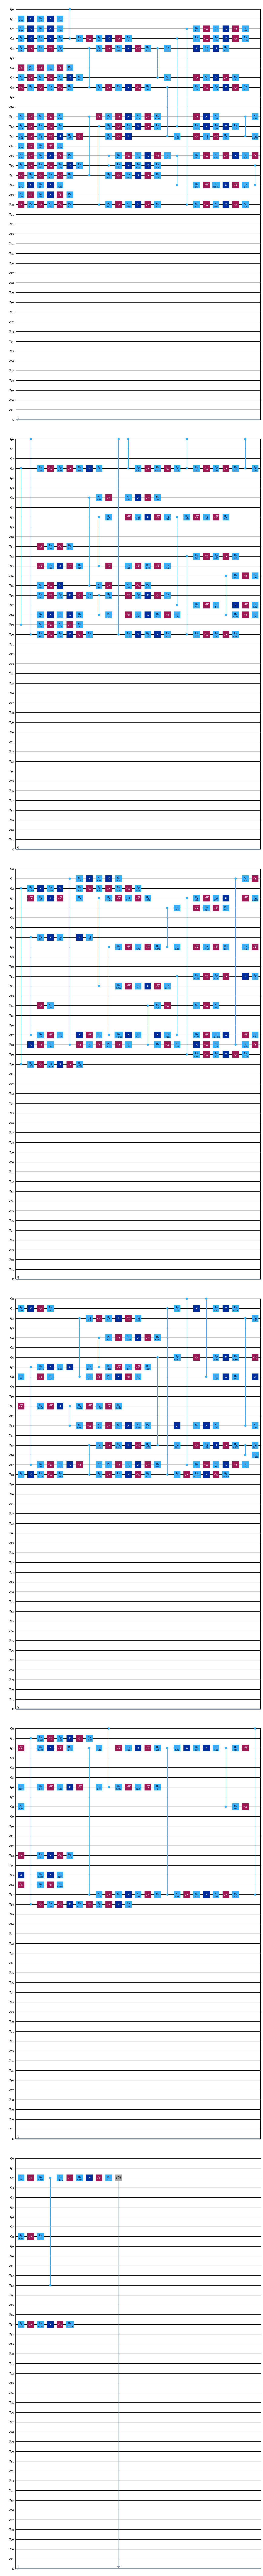

In [158]:
new_qc_2 = QuantumCircuit(42,42)
q_num_list = list_of_conn
current_gate_number = 0
for gate in new_qc.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 in q_num_list:
            #print(q1)
            #print(new_qc.data[current_gate_number])
            new_qc_2.append(new_qc.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 in q_num_list or q2 in q_num_list:
            new_qc_2.append(new_qc.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    current_gate_number = current_gate_number + 1

#new_qc_2.measure_all()

#new_qc_2.draw('mpl')

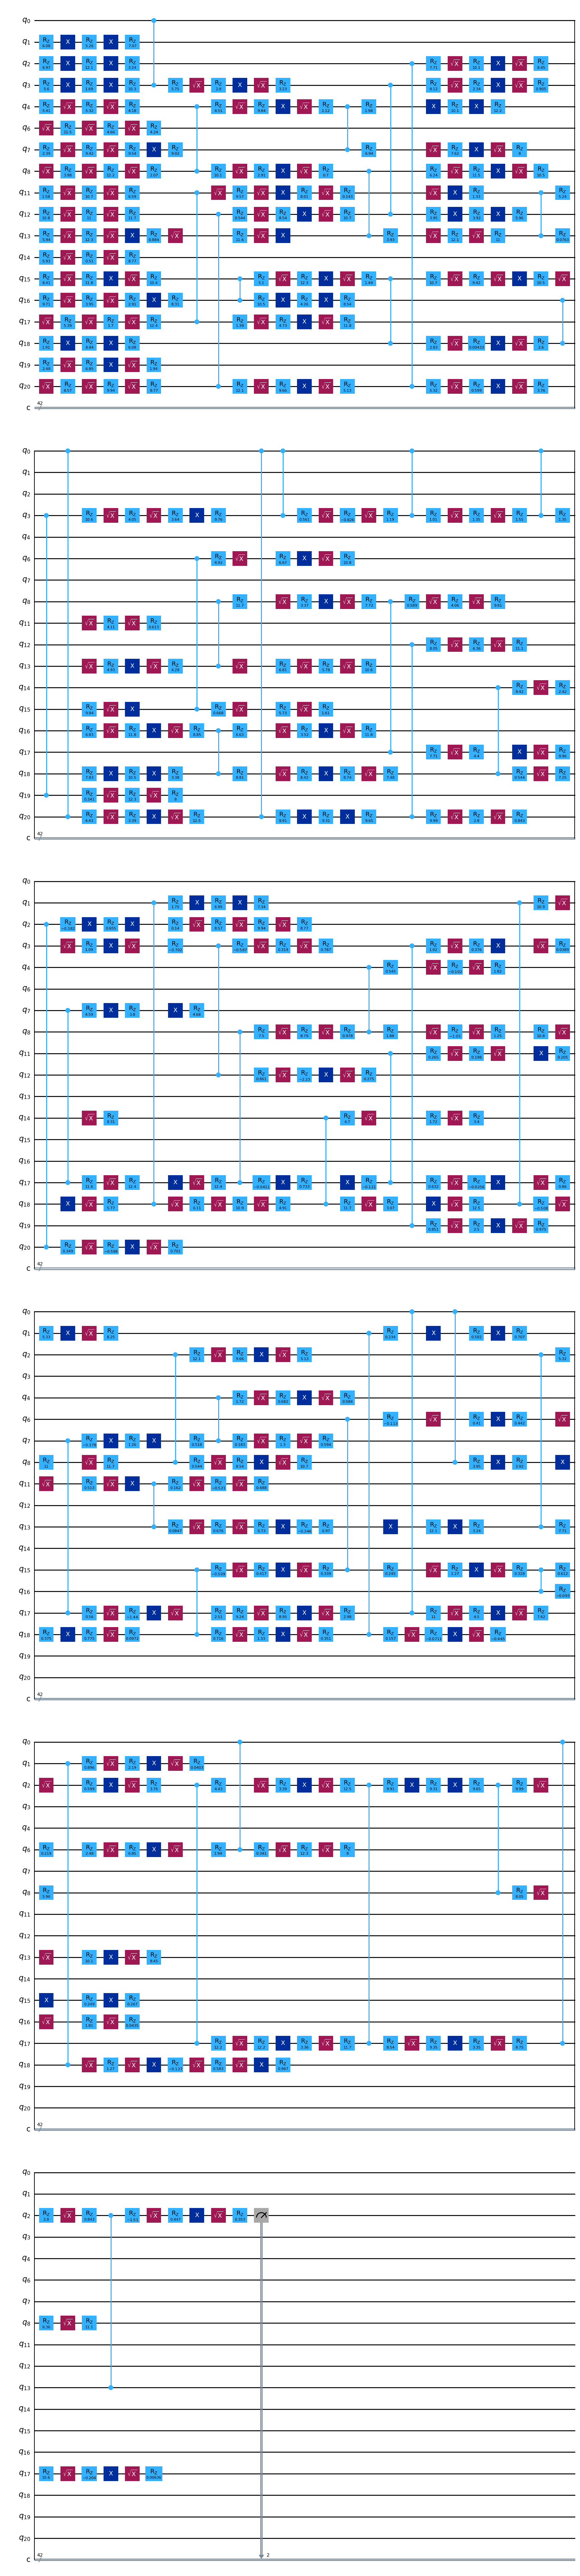

In [156]:
remove_unused_wires(new_qc_2)
#icl = 0
#for q in new_qc_2.qubits:
#    new_qc_2.measure(q,new_qc_2.clbits[icl])
#    icl = icl + 1

#new_qc_2.draw('mpl')

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: lBjTRzTRcrfPnOO4, device: cpu, run status: COMPLETED, created on: 2024-10-25 17:28:42 UTC, cost: $0.00, run time: 34 ms, queue time: 22 ms, num qubits: 42


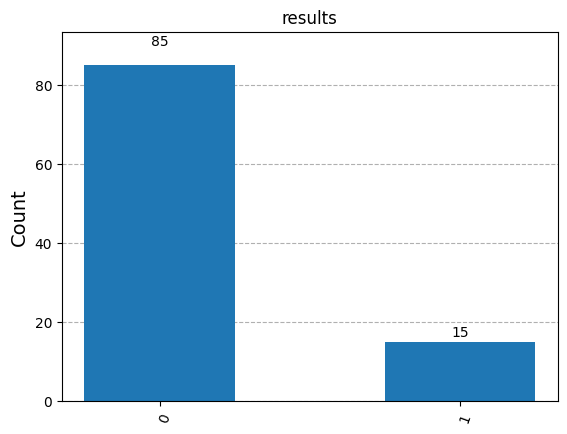

In [157]:
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(new_qc_2, shots = 100)
counts = result.get_counts()
plot_histogram(counts, title = 'results')